In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('./../Dataset/spam-vs-ham-dataset.csv',encoding="ISO-8859-1")
df.head()

,Text,Label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [3]:
df.isnull().sum()

Text     0
Label    0
dtype: int64

In [5]:
df.duplicated().sum()

403

In [6]:
df.drop_duplicates(keep='first',inplace=True)

In [7]:
df.shape

(5171, 2)

In [8]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Label']=le.fit_transform(df['Label'])
df.head()

,Text,Label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


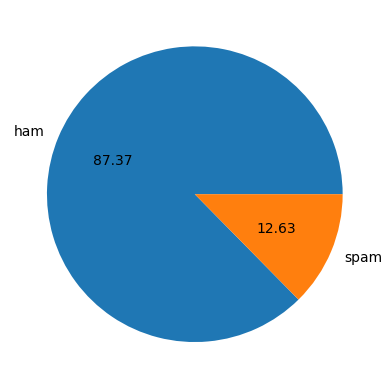

In [11]:
plt.pie(df['Label'].value_counts(),labels=['ham','spam'],autopct="%.02f")
plt.savefig('./../Image/Spam-vs-ham-piechart.jpg')

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
df['num_chr']=df['Text'].apply(len)
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sent']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [15]:
df.sample(5)

,Text,Label,num_chr,num_words,num_sent
4755,Ok lor... Or u wan me go look 4 u?,0,34,12,1
5435,You're gonna have to be way more specific than...,0,51,12,1
1299,Your daily text from me â a favour this time,0,46,10,1
2254,Lol enjoy role playing much?,0,28,6,1
998,Not a lot has happened here. Feels very quiet....,0,148,36,5


In [16]:
df.describe()

,Label,num_chr,num_words,num_sent
count,5171.000000,5171.000000,5171.000000,5171.000000
mean,0.126281,79.457552,18.590988,1.973893
std,0.332198,58.401504,13.383728,1.458880
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,119.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [17]:
df[['num_chr','num_words','num_sent']].describe()

,num_chr,num_words,num_sent
count,5171.000000,5171.000000,5171.000000
mean,79.457552,18.590988,1.973893
std,58.401504,13.383728,1.458880
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [18]:
df[df['Label']==0][['num_chr','num_words','num_sent']].describe()

,num_chr,num_words,num_sent
count,4518.000000,4518.000000,4518.000000
mean,70.976538,17.265162,1.827579
std,56.610538,13.566409,1.394245
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [19]:
df[df['Label']==1][['num_chr','num_words','num_sent']].describe()

,num_chr,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,138.136294,27.764165,2.986217
std,29.934972,6.988123,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


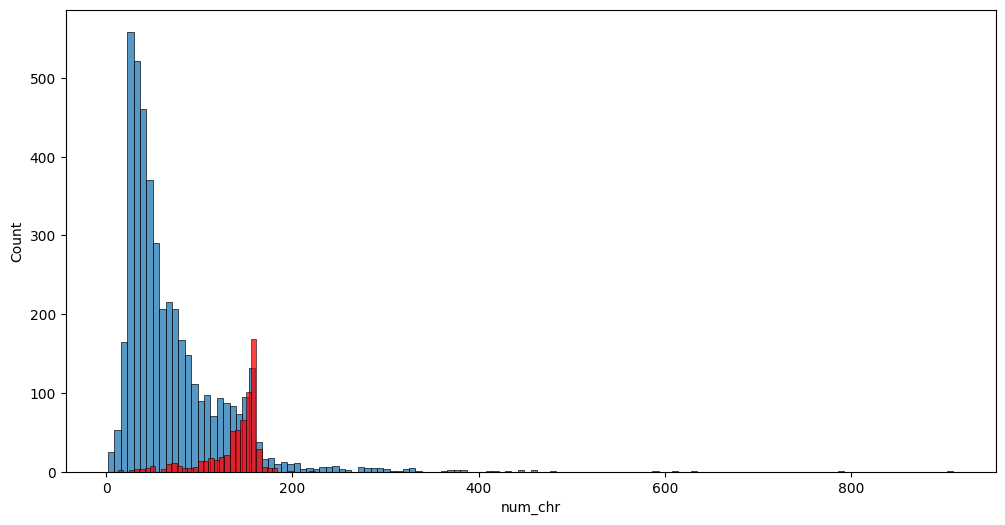

In [23]:
plt.figure(figsize=(12,6))

sns.histplot(df[df['Label']==0]['num_chr'])
sns.histplot(df[df['Label']==1]['num_chr'],color='red')
plt.savefig('./../Image/spam-ham-num_chr.jpg')

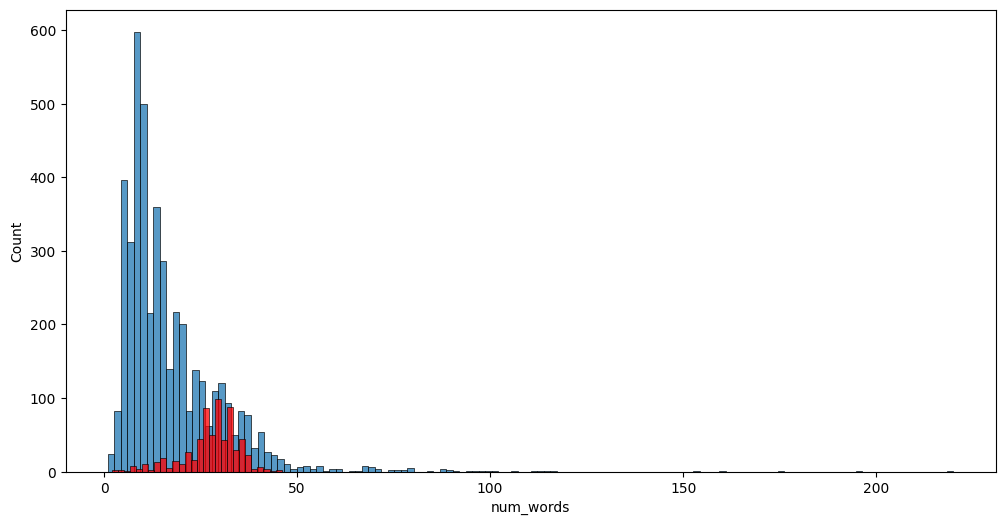

In [26]:
plt.figure(figsize=(12,6))

sns.histplot(df[df['Label']==0]['num_words'])
sns.histplot(df[df['Label']==1]['num_words'],color='red')
plt.savefig('./../Image/spam-ham-num_word.jpg')

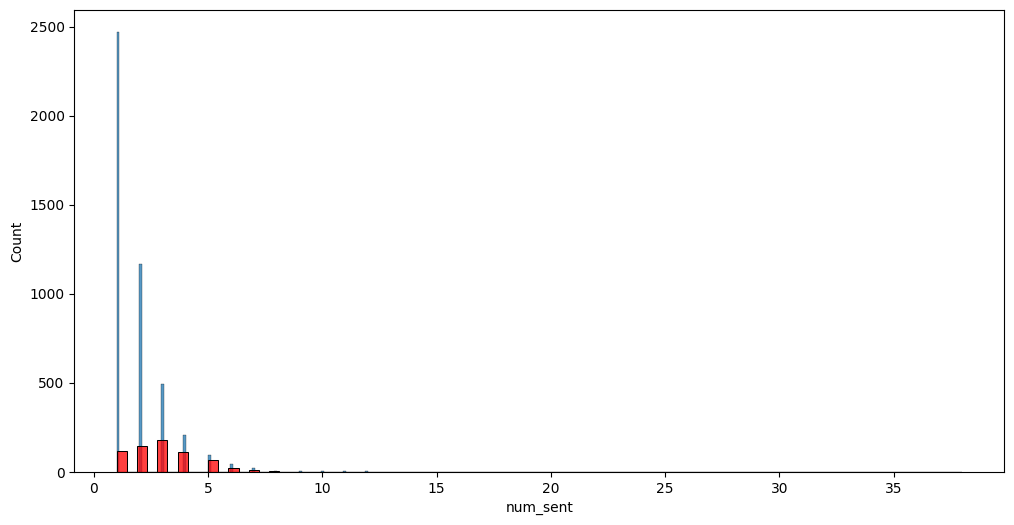

In [27]:
plt.figure(figsize=(12,6))

sns.histplot(df[df['Label']==0]['num_sent'])
sns.histplot(df[df['Label']==1]['num_sent'],color='red')
plt.savefig('./../Image/spam-ham-num_sent.jpg')

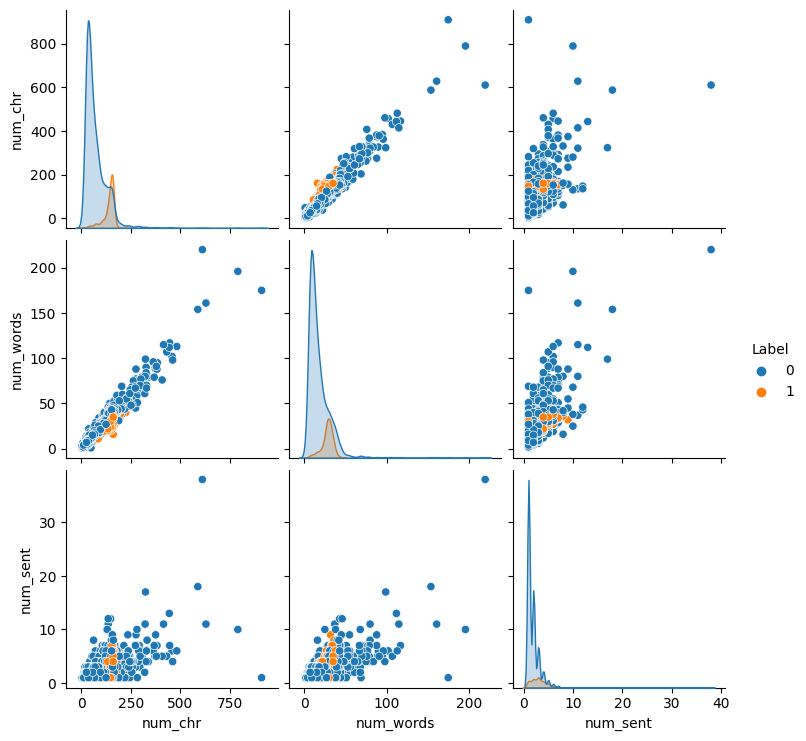

In [30]:
sns.pairplot(df,hue='Label')
plt.savefig('./../Image/PairPlot_withHue.png',dpi=300)

In [31]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
from nltk.corpus import stopwords
import string

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()

In [33]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(lemmatizer.lemmatize(i))
    
            
    return " ".join(y)

In [34]:
df['Transformer_text']=df['Text'].apply(transform_text)
df.head()

,Text,Label,num_chr,num_words,num_sent,Transformer_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think go usf life around though


In [50]:
df.to_csv('./../Dataset/newData.csv')

In [35]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [36]:
X=tfidf.fit_transform(df['Transformer_text']).toarray()

In [37]:
X.shape

(5171, 3000)

In [40]:
y=df['Label'].values

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [42]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
svm=SVC()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier(n_estimators=50, random_state=2)

In [44]:
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.885024154589372
[[796  91]
 [ 28 120]]
0.5687203791469194


In [46]:
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9623188405797102
[[886   1]
 [ 38 110]]
0.990990990990991


In [47]:
bnb.fit(X_train,y_train)
y_pred=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9739130434782609
[[886   1]
 [ 26 122]]
0.991869918699187


In [48]:
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9632850241545894
[[886   1]
 [ 37 111]]
0.9910714285714286


In [49]:
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9062801932367149
[[887   0]
 [ 97  51]]
1.0


In [52]:
# Here we can see that the BernoulliNB Algorithm has the highest accuracy and give correct decision


**STREAMLIT GUI**

In [51]:
import streamlit as st
from nltk.stem import WordNetLemmatizer
import pickle
import nltk
import string
from nltk.corpus import stopwords

 
lemmatizer = WordNetLemmatizer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(lemmatizer.lemmatize(i))
    
            
    return " ".join(y)


# Store the model in your file
# tfidf=pickle.load(open('vectorizer.pkl','rb'))
# model=pickle.load(open('bnb.pkl','rb'))

st.title('SMS Spam Classification')

sms_input=st.text_area("Enter the text")

if st.button('Predict'):
    transform_sms=transform_text(sms_input)

    vector_input=tfidf.transform([transform_sms])

    result=bnb.predict(vector_input)[0]

    if result==1:
        st.title("SMS is Spam")

    else:
        st.title("SMS is not Spam")

2024-02-11 19:05:31.396 
  command:

    streamlit run C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
